<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Vector_Auto_Regression_using_differencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log
from math import exp

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse,aic
import os

#os.chdir("C:\\Users\\akashshar\\Desktop\\VAR forecasting_ 30Mar'22\\")

In [ ]:
df = pd.read_excel('Weekly breakdown_Macro factors_Refinance Vols.xlsx')

In [ ]:
df.head()

,Week No#,From Date,To Date,Volumes,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income Ratio
0,Week 01-2019,"December 31, 2018","January 6, 2019",885,4.295000,1.775000,189.515000,1.700000,3.900000,2.275,100.124797,101.160700,329495.250000,16131.925000
1,Week 02-2019,"January 7, 2019","January 13, 2019",1094,4.450000,1.600000,187.610000,2.160000,4.000000,2.400,100.519500,101.001200,348680.142857,16027.800000
2,Week 03-2019,"January 14, 2019","January 20, 2019",1078,4.450000,1.600000,187.610000,2.195714,4.000000,2.400,100.519500,101.001200,322446.857143,16027.800000
3,Week 04-2019,"January 21, 2019","January 27, 2019",1032,4.450000,1.600000,187.610000,1.747143,4.000000,2.400,100.519500,101.001200,264000.714286,16027.800000
4,Week 05-2019,"January 28, 2019","February 3, 2019",989,4.455714,1.557143,188.008571,2.168571,3.914286,2.400,100.447457,101.026014,251632.285714,16047.514286


In [ ]:
#checking for stationarity

In [ ]:
df.columns

Index(['Week No#', 'From Date', 'To Date', 'Volumes', 'Mortgage Rate',
       'Inflation', 'Housing Price Index', 'Treasury Yield',
       'Unemployment Rate', 'GDP', 'Business Confidence Index',
       'Consumer Confidence Index', 'Initial Unemployment Claim',
       'Disposable Income Ratio'],
      dtype='object')

In [ ]:
df1 = df.drop(['Week No#', 'From Date', 'To Date'], axis=1)

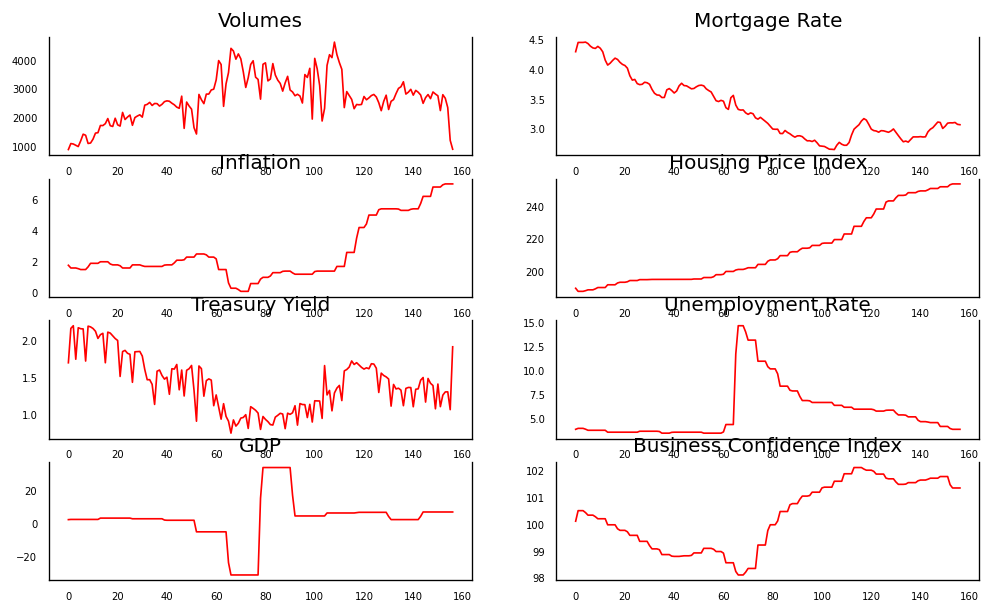

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    #Decorations
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df1=pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X={c}, P Values={p_values}')
            min_p_value = np.min(p_values)
            df1.loc[r,c] = min_p_value
    df1.columns = [var +'_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df1, variables=df1.columns)

,Week No#,From Date,To Date,Volumes,Mortgage Rate,Inflation,Housing Price Index,Treasury Yield,Unemployment Rate,GDP,Business Confidence Index,Consumer Confidence Index,Initial Unemployment Claim,Disposable Income Ratio
0,Week 01-2019,"December 31, 2018","January 6, 2019",885,4.295000,1.775000,189.515000,1.700000,3.900000,2.275,100.124797,101.160700,329495.250000,16131.925000
1,Week 02-2019,"January 7, 2019","January 13, 2019",1094,4.450000,1.600000,187.610000,2.160000,4.000000,2.400,100.519500,101.001200,348680.142857,16027.800000
2,Week 03-2019,"January 14, 2019","January 20, 2019",1078,4.450000,1.600000,187.610000,2.195714,4.000000,2.400,100.519500,101.001200,322446.857143,16027.800000
3,Week 04-2019,"January 21, 2019","January 27, 2019",1032,4.450000,1.600000,187.610000,1.747143,4.000000,2.400,100.519500,101.001200,264000.714286,16027.800000
4,Week 05-2019,"January 28, 2019","February 3, 2019",989,4.455714,1.557143,188.008571,2.168571,3.914286,2.400,100.447457,101.026014,251632.285714,16047.514286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Week 48-2021,"November 29, 2021","December 5, 2021",2800,3.105714,6.942857,253.357143,1.267143,3.985714,6.900,101.488314,97.718886,236113.571429,18229.500000
153,Week 49-2021,"December 6, 2021","December 12, 2021",2675,3.104286,7.000000,253.860000,1.310000,3.900000,6.900,101.366200,97.784660,278722.714286,18240.900000
154,Week 50-2021,"December 13, 2021","December 19, 2021",2349,3.111429,7.000000,253.860000,1.311429,3.900000,6.900,101.366200,97.784660,262643.142857,18240.900000
155,Week 51-2021,"December 20, 2021","December 26, 2021",1205,3.080000,7.000000,253.860000,1.072857,3.900000,6.900,101.366200,97.784660,255835.000000,18240.900000


In [ ]:
#cointegration test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df1, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df1,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Volumes ::  518.75    > 263.2603  =>   True
Mortgage Rate ::  417.45    > 219.4051  =>   True
Inflation ::  328.87    > 179.5199  =>   True
Housing Price Index ::  249.02    > 143.6691  =>   True
Treasury Yield ::  190.4     > 111.7797  =>   True
Unemployment Rate ::  138.98    > 83.9383   =>   True
GDP    ::  93.0      > 60.0627   =>   True
Business Confidence Index ::  58.37     > 40.1749   =>   True
Consumer Confidence Index ::  36.16     > 24.2761   =>   True
Initial Unemployment Claim ::  20.16     > 12.3212   =>   True
Disposable Income Ratio ::  9.26      > 4.1296    =>   True


In [ ]:
nobs = 25
df1_train, df1_test = df1[0:-nobs], df1[-nobs:]

print(df1_train.shape)
print(df1_test.shape)

(132, 11)
(25, 11)


In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in df1_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Volumes" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3793
 No. Lags Chosen       = 3
 Critical value 1%     = -3.483
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.1477. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Mortgage Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2677
 No. Lags Chosen       = 3
 Critical value 1%     = -3.483
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.1826. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Inflation" 
    -----------------------------------------------
 Null Hypothesis:

In [ ]:
df1_differenced = df1_train.diff().dropna()

In [ ]:
for name, column in df1_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Volumes" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.5521
 No. Lags Chosen       = 2
 Critical value 1%     = -3.483
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Mortgage Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9726
 No. Lags Chosen       = 2
 Critical value 1%     = -3.483
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

In [ ]:
df2_differenced = df1_differenced.diff().dropna()

In [ ]:
for name, column in df2_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Volumes" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.4474
 No. Lags Chosen       = 7
 Critical value 1%     = -3.485
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Mortgage Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7237
 No. Lags Chosen       = 9
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance L

In [ ]:
model = VAR(df2_differenced)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  31.130172911983454
BIC :  34.056492581562836
FPE :  33284295513115.426
HQIC:  32.31919583471091 

Lag Order = 2
AIC :  30.49046282838225
BIC :  36.127678896910865
FPE :  18225670469812.324
HQIC:  32.78089249719214 

Lag Order = 3
AIC :  27.21349450034509
BIC :  35.589289542357
FPE :  763046119196.7145
HQIC:  30.616478961329747 

Lag Order = 4
AIC :  25.96399270117337
BIC :  37.10652876419704
FPE :  271223289255.88297
HQIC:  30.490855893420648 

Lag Order = 5
AIC :  25.761212627394052
BIC :  39.699142724819794
FPE :  327092362061.3146
HQIC:  31.423457858450945 



C:\Users\gauravtak\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,34.87,35.12,1.389e+15,34.97
1,31.29,34.28*,3.904e+13,32.50
2,30.60,36.32,2.040e+13,32.93
3,27.12,35.58,7.018e+11,30.56
4,25.94,37.14,2.682e+11*,30.49*
5,25.76*,39.70,3.271e+11,31.42


In [ ]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 14, Apr, 2022
Time:                     12:19:14
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    39.6991
Nobs:                     125.000    HQIC:                   31.4235
Log likelihood:          -2945.12    FPE:                3.27092e+11
AIC:                      25.7612    Det(Omega_mle):     5.57463e+09
--------------------------------------------------------------------
Results for equation Volumes
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                -5.853999        47.677935           -0.123           0.902
L1.Volumes                           -1.048960         0.126999           -8.260           

In [ ]:
##from statsmodels.stats.stattools import durbin_watson
##out = durbin_watson(model_fitted.resid)

##for col, val in zip(df2_differenced.columns, out):
  ##  print(adjust(col), ':', round(val, 2))

In [ ]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df2_differenced.values[-lag_order:]
forecast_input

5


array([[-7.80000000e+01, -1.42857143e-03, -2.85714286e-01,
        -3.57142857e+00,  5.82857143e-01, -7.14285714e-02,
         0.00000000e+00,  1.26642857e-01,  1.00000000e-01,
        -2.17164286e+04, -1.50714286e+01],
       [ 6.04000000e+02,  3.42857143e-02, -5.71428571e-02,
        -7.14285714e-01, -2.90000000e-01, -1.42857143e-02,
         0.00000000e+00,  2.53285714e-02,  2.00000000e-02,
         6.15864286e+04, -3.01428571e+00],
       [-1.10000000e+02,  1.28571429e-02,  0.00000000e+00,
         0.00000000e+00,  1.28571429e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.50595714e+04,  0.00000000e+00],
       [-7.16000000e+02, -9.14285714e-02,  0.00000000e+00,
         1.94285714e+00, -1.00000000e-02, -2.85714286e-01,
        -2.51428571e+00, -1.17771429e-01, -1.60000000e-01,
        -2.73414286e+03,  1.23942857e+02],
       [ 7.86000000e+02,  2.85714286e-03,  0.00000000e+00,
        -4.85714286e-01, -3.34285714e-01,  7.14285714e-02,
  

In [ ]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df1_forecast = pd.DataFrame(fc, index=df1.index[-nobs:], columns=df1.columns + '_2d')
df1_forecast

In [ ]:
#Inverse first order differencing
df1_forecast['Volumes_1d'] = (df1['Volumes'].iloc[-nobs-1]-df1['Volumes'].iloc[-nobs-2]) + df1_forecast['Volumes_2d'].cumsum()
df1_forecast['Volumeforecast'] = df1['Volumes'].iloc[-nobs-1] + df1_forecast['Volumes_1d'].cumsum()


In [ ]:
df1_forecast

In [ ]:
test_original = df1[-nobs:]
test_original.index = pd.to_datetime(test_original.index)

In [ ]:
test_original

In [ ]:
#Forecasted values
df1_forecast['Volumeforecast']

In [ ]:
#Actual_test_values
test_original['Volumes']

In [ ]:
#def invert_transformation(df1_train, df1_forecast, second_diff=False):
#    """Revert back the differencing to get the forecast to original scale."""
#    df1_fc = df1_forecast.copy()
#    columns = df1_train.columns
#    for col in columns:        
#        # Roll back 2nd Diff
#        if second_diff:
#            df1_fc[str(col)+'_1d'] = (df1_train[col].iloc[-1]-df1_train[col].iloc[-2]) + df1_fc[str(col)+'_2d'].cumsum()
#        # Roll back 1st Diff
#        df1_fc[str(col)+'_forecast'] = df1_train[col].iloc[-1] + df1_fc[str(col)+'_1d'].cumsum()
#    return df1_fc

In [ ]:
#df_results = invert_transformation(df1_train, df1_forecast, second_diff=True)        
##df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
  ##                 'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]
#df_results.loc[:,['Volumes_2d','Mortgage Rate_2d','Inflation_2d','Housing Price Index_2d','Treasury Yield_2d','Unemployment Rate_2d','GDP_2d','Business Confidence Index_2d','Consumer Confidence Index_2d','Initial Unemployment Claim_2d','Disposable Income Ratio_2d']]

In [ ]:
#df_results